Epoch [100/1000], Loss: 1.0844
Epoch [200/1000], Loss: 1.0356
Epoch [300/1000], Loss: 1.0151
Epoch [400/1000], Loss: 1.0043
Epoch [500/1000], Loss: 0.9987
Epoch [600/1000], Loss: 0.9957
Epoch [700/1000], Loss: 0.9942
Epoch [800/1000], Loss: 0.9933
Epoch [900/1000], Loss: 0.9929
Epoch [1000/1000], Loss: 0.9927


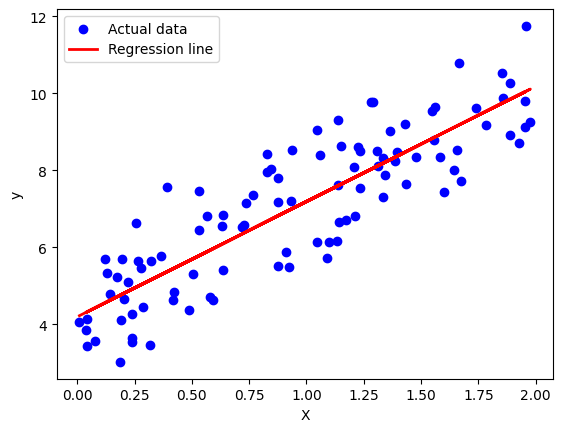

In [66]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generating some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1).astype(np.float32)
y = 4 + 3 * X + np.random.randn(100, 1).astype(np.float32)

# Converting numpy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# Defining the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiating the model, defining the loss function and the optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Making predictions
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).detach().numpy()

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [67]:
# Making predictions
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)

# Compute error metrics
mae = torch.nn.functional.l1_loss(predictions, y_tensor)  # Mean Absolute Error
mse = torch.nn.functional.mse_loss(predictions, y_tensor)  # Mean Squared Error
rmse = torch.sqrt(mse)  # Root Mean Squared Error
r2_score = 1 - torch.sum((y_tensor - predictions) ** 2) / torch.sum((y_tensor - y_tensor.mean()) ** 2)  # R^2 score

print(f"MAE: {mae.item()}, MSE: {mse.item()}, RMSE: {rmse.item()}, R^2: {r2_score.item()}")

MAE: 0.849731981754303, MSE: 0.9926851391792297, RMSE: 0.9963358640670776, R^2: 0.7469000816345215
